<a href="https://colab.research.google.com/github/GiorgiaAuroraAdorni/ML-bachelor-course-assignments-sp23/blob/main/assignment%201/deliverable/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Student: Name Surname

--- 
# IMPORTANT: all the submitted code should be in 2 cells
1) How you trained, evaluated and saved your model
2) How to load your model from a file, load the data and evaluate the model. Cell 2) should be running independently (even if cell 1 is not run)

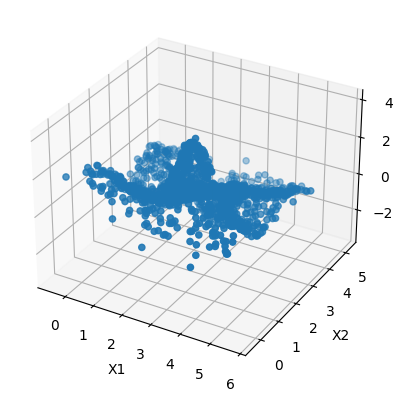

d-D Train performance: 	0.73
d-D Test performance: 	0.80
theta:  [ 1.31635295 -0.05128958 -0.57659976  0.42026517  0.03686637]
Mean squared error:  0.8038461300867037


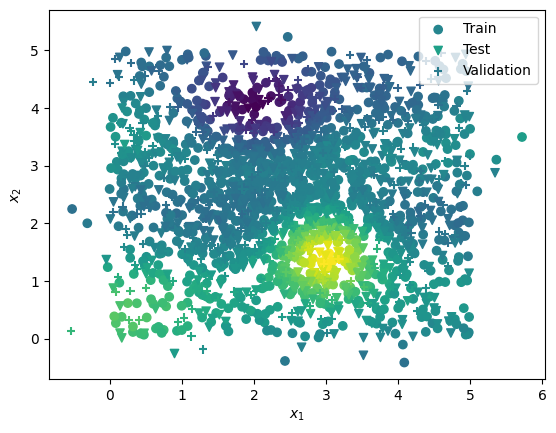

Mean Squared Error 0.03161715117092857
Everything useful


In [ ]:
# Import libraries
import io
import requests
import numpy as np
import pickle
# Load data 
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz' # path to the .npz file storing the data
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y

# T1
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, shuffle=True, random_state=0)
# Let's plot some data
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
d_linear_model = LinearRegression()  
d_linear_model.fit(x_train, y_train)
# Numerically validate the results
# 2-dimensional train
d_train_pred = d_linear_model.predict(x_train)
d_train_performance = mean_squared_error(d_train_pred, y_train)

# 2-dimensional test
d_test_pred = d_linear_model.predict(x_test)
d_test_performance = mean_squared_error(d_test_pred, y_test)

print(f"d-D Train performance: \t{d_train_performance:.2f}")
print(f"d-D Test performance: \t{d_test_performance:.2f}")
X = np.array([[1, i, j, math.sin(j), i*j] for i,j in x_train])
theta_hat = np.linalg.solve(a=X.T.dot(X), b=X.T.dot(y_train))
print("theta: ",theta_hat)
print("Mean squared error: ",d_test_performance)
filename='LinearModel.pickle'
pickle.dump(d_linear_model,open(filename,'wb'))
# T2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, shuffle=True, random_state=0)
x_train, x_val, y_train, y_val =train_test_split(x_train, y_train, test_size=0.25, shuffle=True,random_state=0) 
# Let's plot some data
import matplotlib.pyplot as plt
import math
plt.scatter(x_train[:, 0], x_train[:, 1], marker='o', c=y_train, label="Train")
plt.scatter(x_test[:, 0], x_test[:, 1], marker="v", c=y_test, label="Test")
plt.scatter(x_val[:, 0], x_val[:, 1], marker="+", c=y_val, label="Validation")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10,include_bias=False)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error",mse)
#save model to PolyModel file
filename2='PolyModel.pickle'
pickle.dump(model,open(filename2,'wb'))
# T3 (Bonus)

print("Everything useful")



# Example on how to use baseline model:

In [25]:
# Import libraries
import joblib
import io
import requests
import numpy as np

def evaluate_predictions(y_true, y_pred):
    """
    Evaluates the mean squared error between the values in y_true and the values
    in y_pred.
    ### YOU CAN NOT EDIT THIS FUNCTION ###
    :param y_true: Numpy array, the true target values from the test set;
    :param y_pred: Numpy array, the values predicted by your model.
    :return: float, the mean squared error between the two arrays.
    """
    assert y_true.shape == y_pred.shape
    return ((y_true - y_pred) ** 2).mean()


def load_model(filename):
    """
    Loads a Scikit-learn model saved with joblib.dump.
    This is just an example, you can write your own function to load the model.
    Some examples can be found in src/utils.py.
    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = joblib.load(filename)

    return model

# Load the data
# This will be replaced with our private test data when grading the assignment

# Load data from url
url = 'https://drive.switch.ch/index.php/s/TeDwnbYsBKRuJjv/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Alternatively yo can load the data from file
# data_path = '../data/data.npz'
# data = np.load(data_path)

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y

# Load the trained model
baseline_model_path = '/content/PolyModel'
baseline_model = load_model(baseline_model_path)

# Change input
x = poly.fit_transform(x)

# Predict on the given samples
y_pred = baseline_model.predict(x)

############################################################################
# STOP EDITABLE SECTION: do not modify anything below this point.
############################################################################

# Evaluate the prediction using MSE
mse = evaluate_predictions(y_pred, y)
print(f'MSE on whole dataset: {mse}')

# NOTE: NOW THIS CELL IS NOT WORKING SINCE YOU NEED TO CHANGE THE INPUT.
# DO IT AND EVERYTHING RUNS SMOOTH


FileNotFoundError: ignored